UPdated on :4May for the incorporating the below feedback from assignment Team:

*Implement model validation techniques like multicollinearity,residual analysis and model deletion techniques like cooks distance.

*Build the final model after these steps and calculate r-squared value.

*Resubmit MLR assignments startup datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style=('darkgrid')

In [2]:
datastartup=pd.read_csv("50_Startups.csv")
datastartup.isna().sum()
datastartup.rename(columns={"R&D Spend":"RnDSpend","Marketing Spend":"MarketingSpend"},inplace=True)

In [30]:
datastartup.describe()

,RnDSpend,Administration,MarketingSpend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [3]:

datastartup.corr()
datastartup.info()
# using label.encoding for State 
stateencoder=LabelEncoder()
datastartup["State"]=stateencoder.fit_transform(datastartup["State"])
datastartup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnDSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnDSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     int32  
 4   Profit          50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


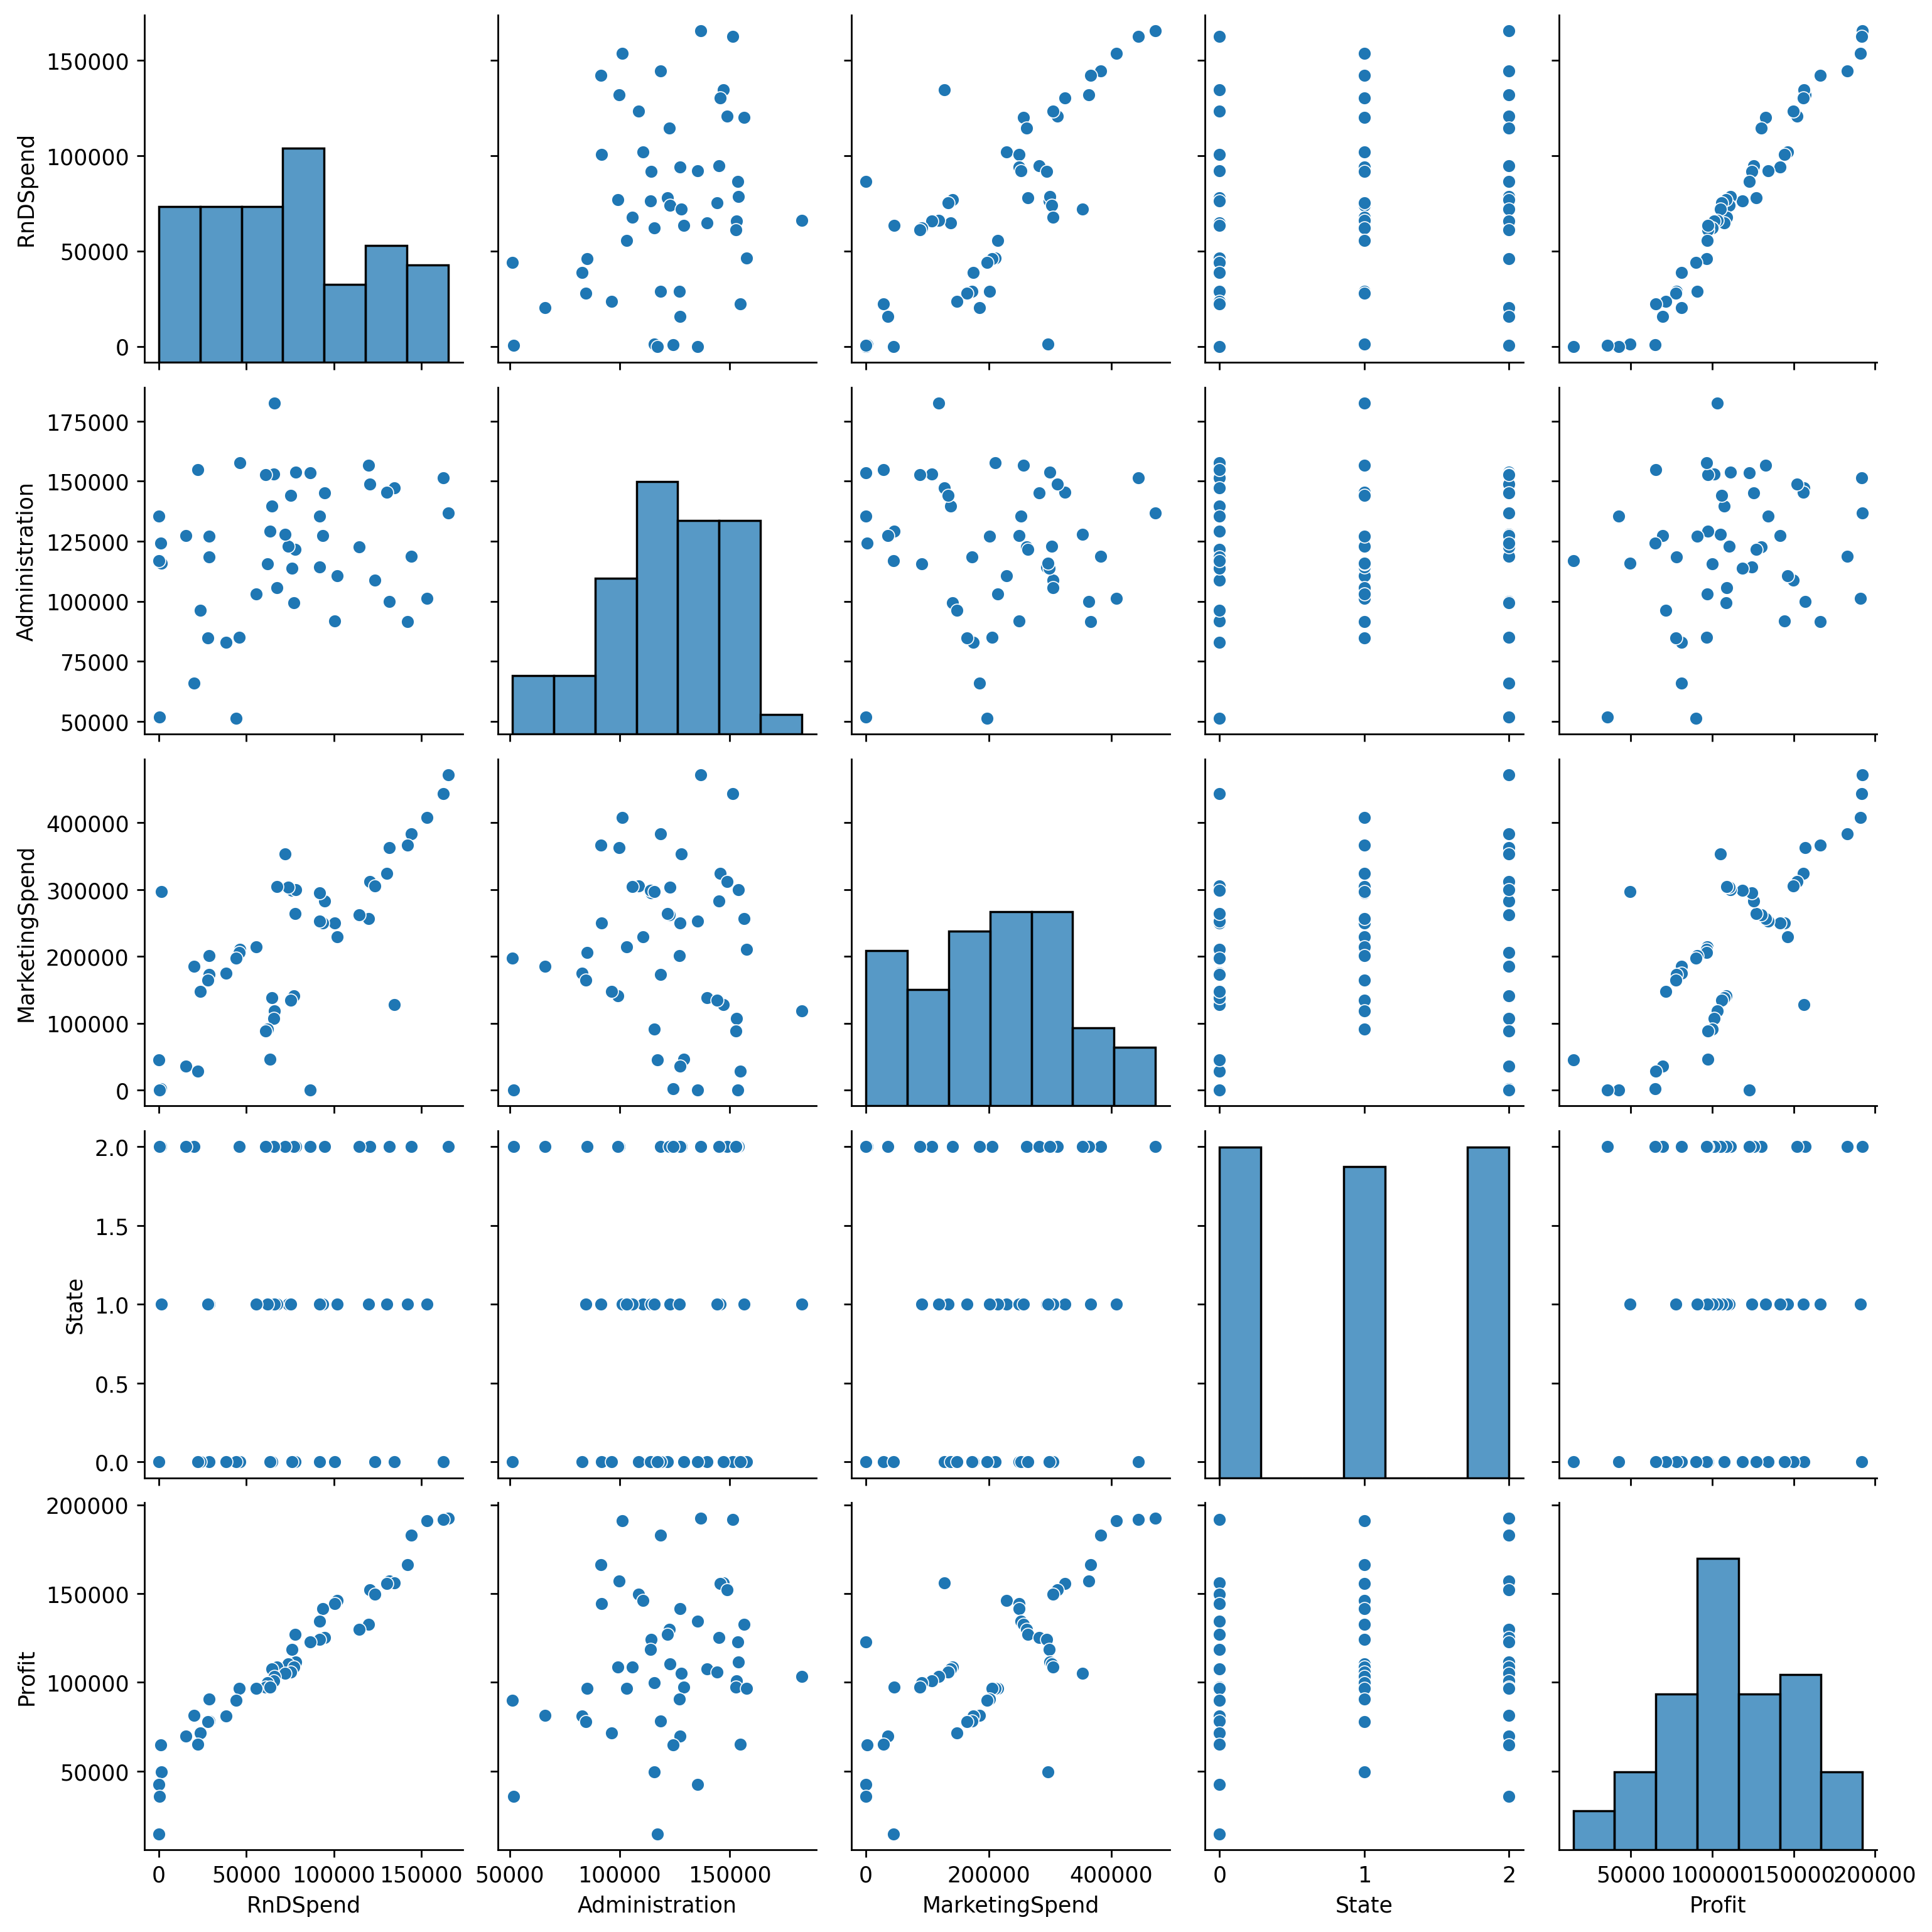

In [4]:
sns.pairplot(datastartup)

<AxesSubplot:>

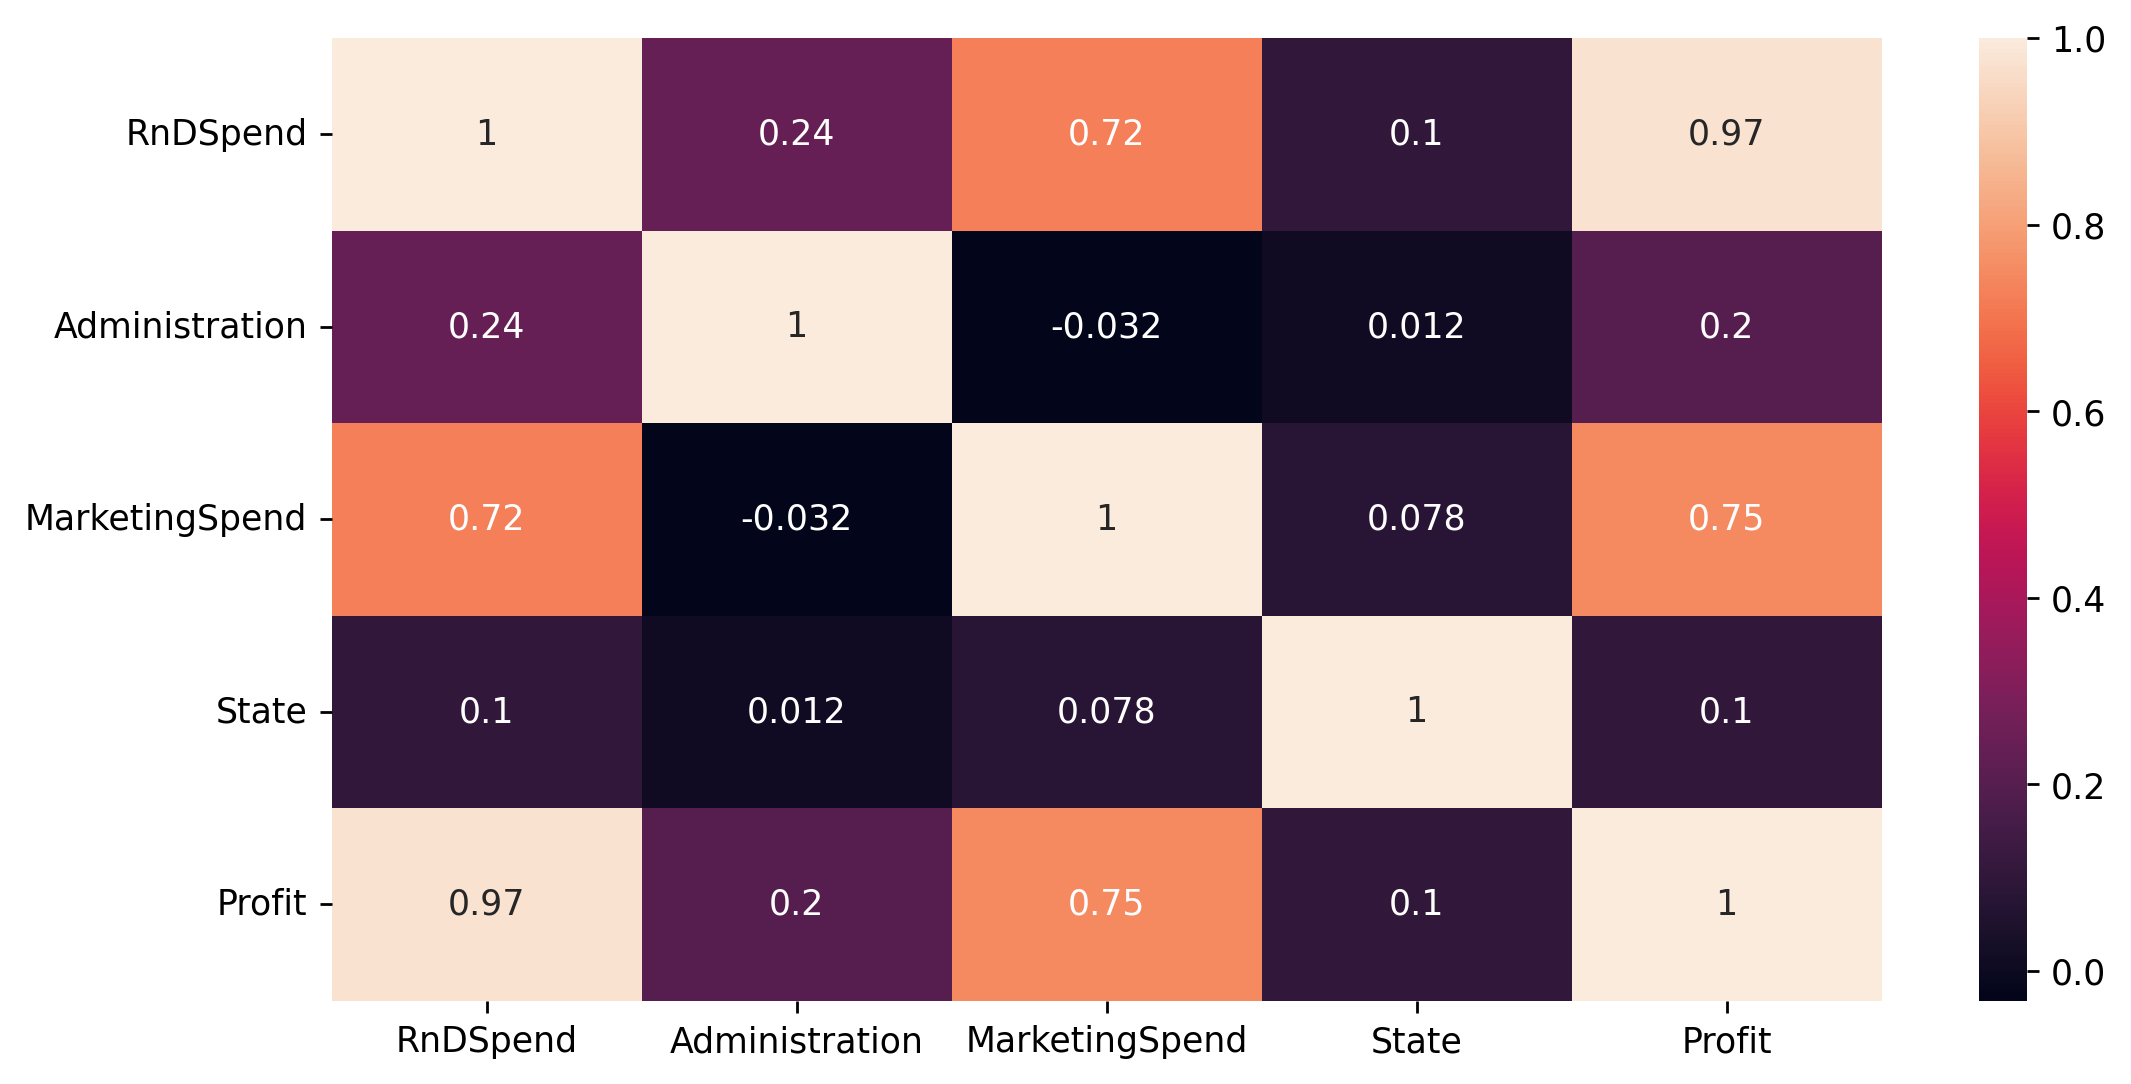

In [5]:
#Correlation
sns.heatmap(datastartup.corr(),annot=True)

# Model Building

In [6]:
import statsmodels.formula.api as smf
datastartup.columns

Index(['RnDSpend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [7]:
multialgo=smf.ols('Profit~RnDSpend+Administration+MarketingSpend+State',data=datastartup).fit()

multialgo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 04 May 2023   Prob (F-statistic):           8.51e-29
Time:                        20:50:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RnDSpend           0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
MarketingSpend     0.0272      0.017      1.637      0.109      -0.006       0.061
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
multialgo.pvalues

Intercept         2.900008e-09
RnDSpend          8.249206e-22
Administration    6.056771e-01
MarketingSpend    1.086131e-01
State             9.889988e-01
dtype: float64

We can say that as per the pvalues all the pvalues are =0.0000  except Administration = 0.6 and state =0.9  As per the model the state and Administration are not contributing to the profit
*also as per the corr above it shows a lot of correlation between RnDSpend and MarketingSpend which is 0.7 hence multicollinearity might exist between the two.

# DOUBT

In [9]:
multialgoAdmin=smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data=datastartup).fit()

multialgoAdmin.pvalues

Intercept         1.057379e-09
RnDSpend          2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64

In [10]:
# still the multialgoAdmin shows that Administration is insignificant.
multialgoAdmin=smf.ols('Profit~RnDSpend+MarketingSpend+State',data=datastartup).fit()
multialgoAdmin.pvalues
# still the multialgoAdmin shows that State   is insignificant.

Intercept         8.270545e-20
RnDSpend          2.013984e-23
MarketingSpend    6.284954e-02
State             9.946539e-01
dtype: float64

In [11]:
multialgoPval=smf.ols('Profit~RnDSpend+MarketingSpend',data=datastartup).fit()

multialgoPval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.16e-31
Time:                        20:50:18   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RnDSpend           0.7966      0.041     19.266      0.000       0.713       0.880
MarketingSpend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculate VIF

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(datastartup.values,i) for i in range(len(datastartup.columns))]
vif["Columns"]=datastartup.columns
vif

,VIF,Columns
0,30.662561,RnDSpend
1,13.560873,Administration
2,9.847180,MarketingSpend
3,2.444870,State
4,81.707826,Profit


# NORMALITY TEST


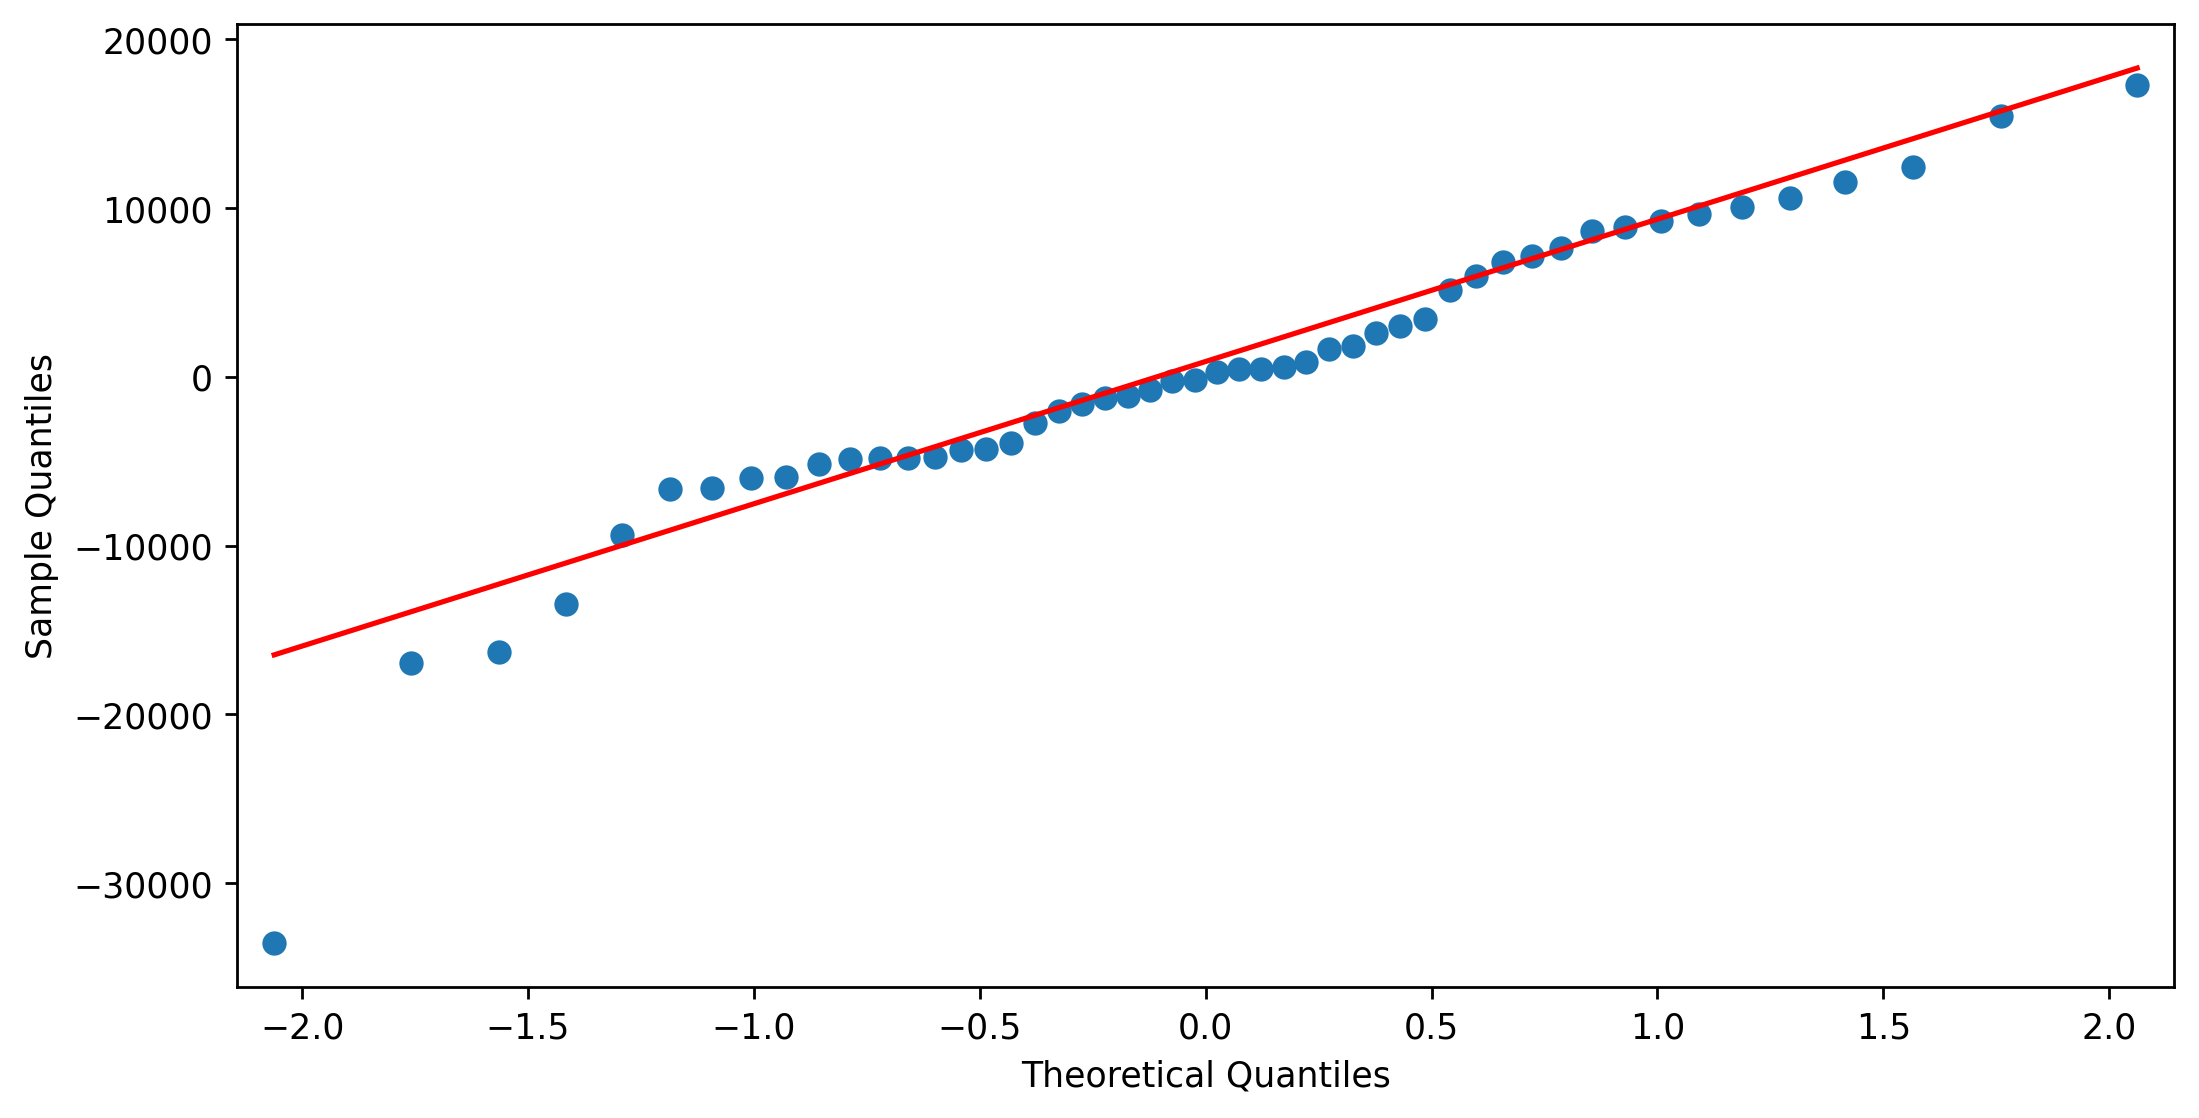

In [13]:
import statsmodels.api as sm
multialgo.resid
#Q-Q plot
sm.qqplot(multialgo.resid, line='q');

In [14]:
#get index for lower  residuals
np.where(multialgo.resid<-20000)

(array([49], dtype=int64),)

# 2. Residual plot of Homoscedasticity
Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

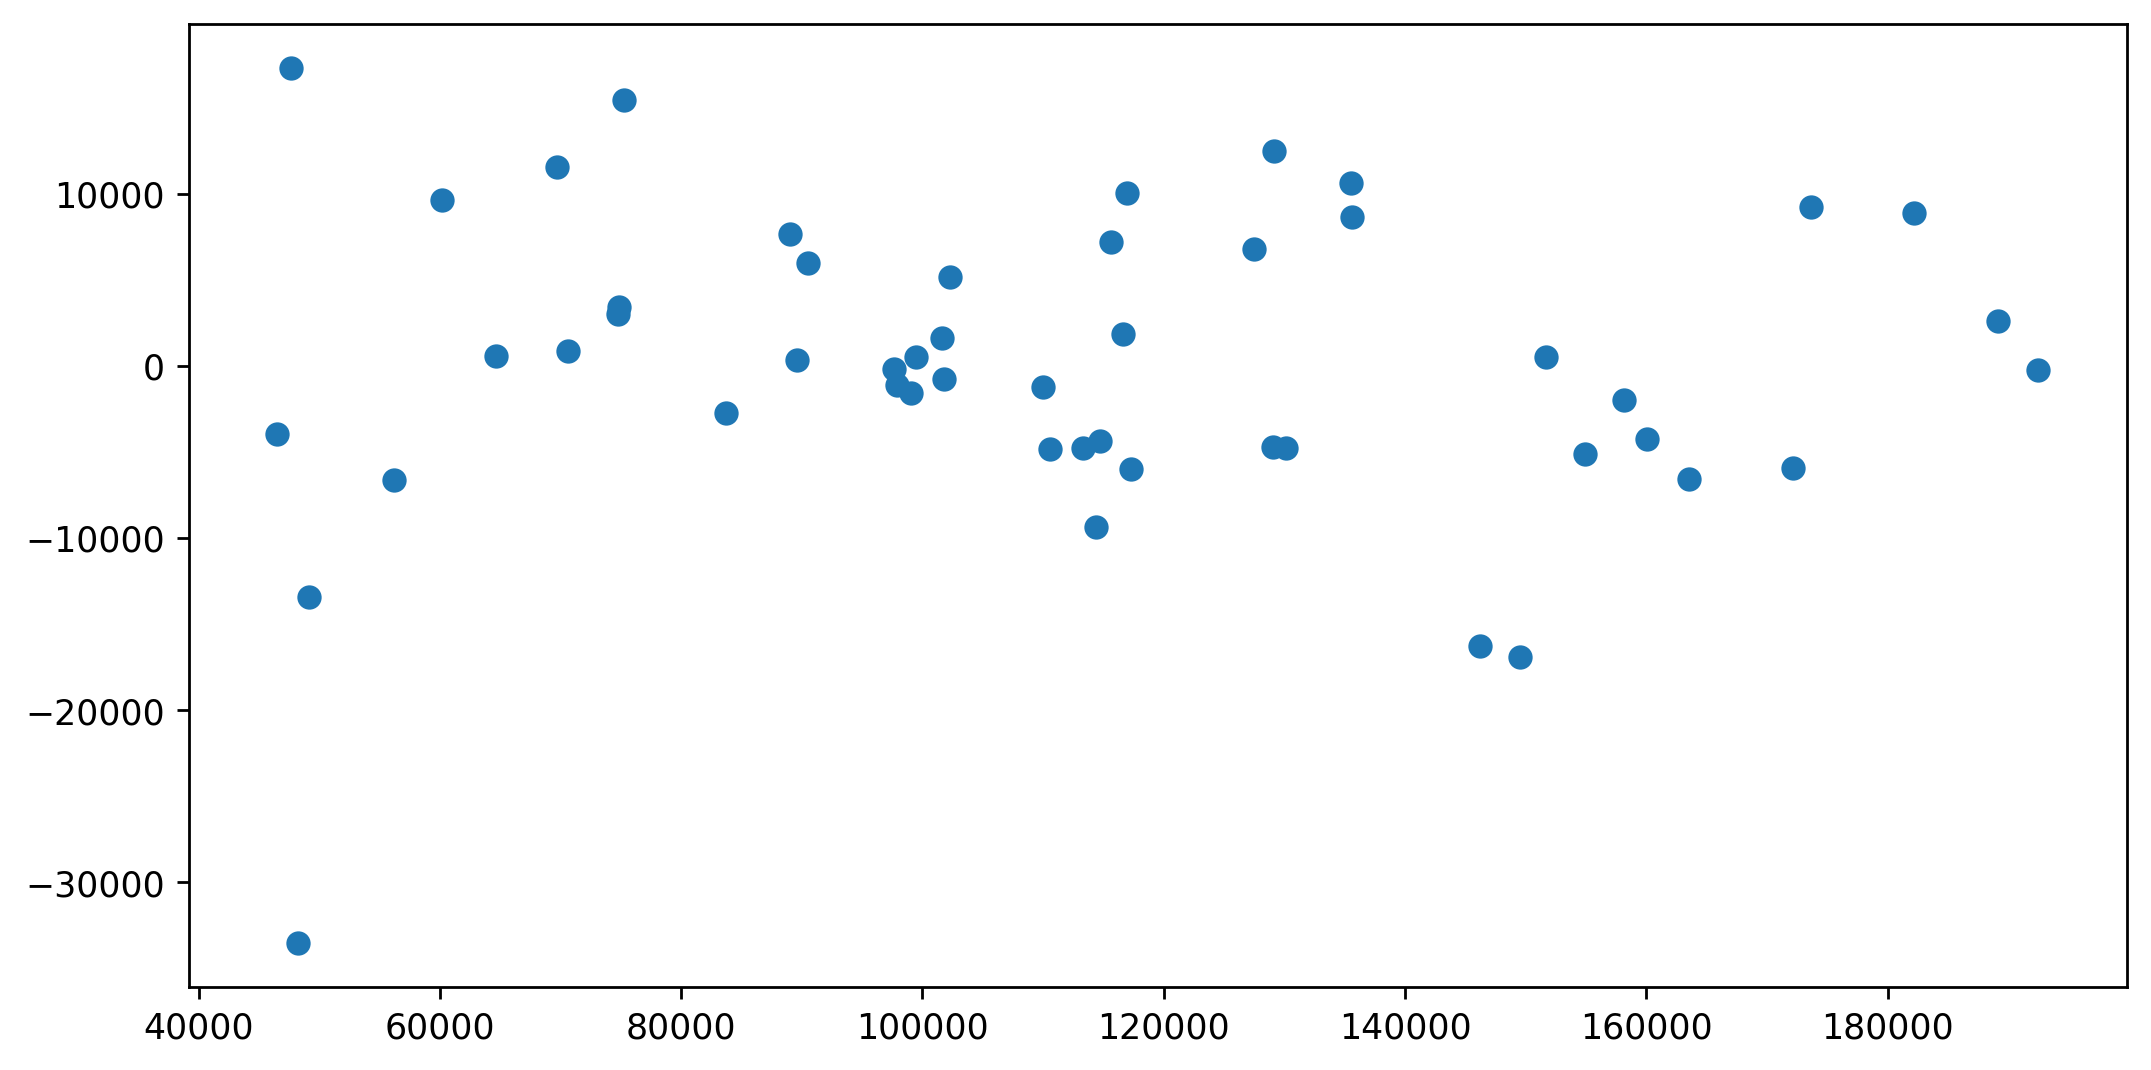

In [15]:
plt.scatter(multialgo.fittedvalues,multialgo.resid)

# 3.Residual VS Regressor

eval_env: 1


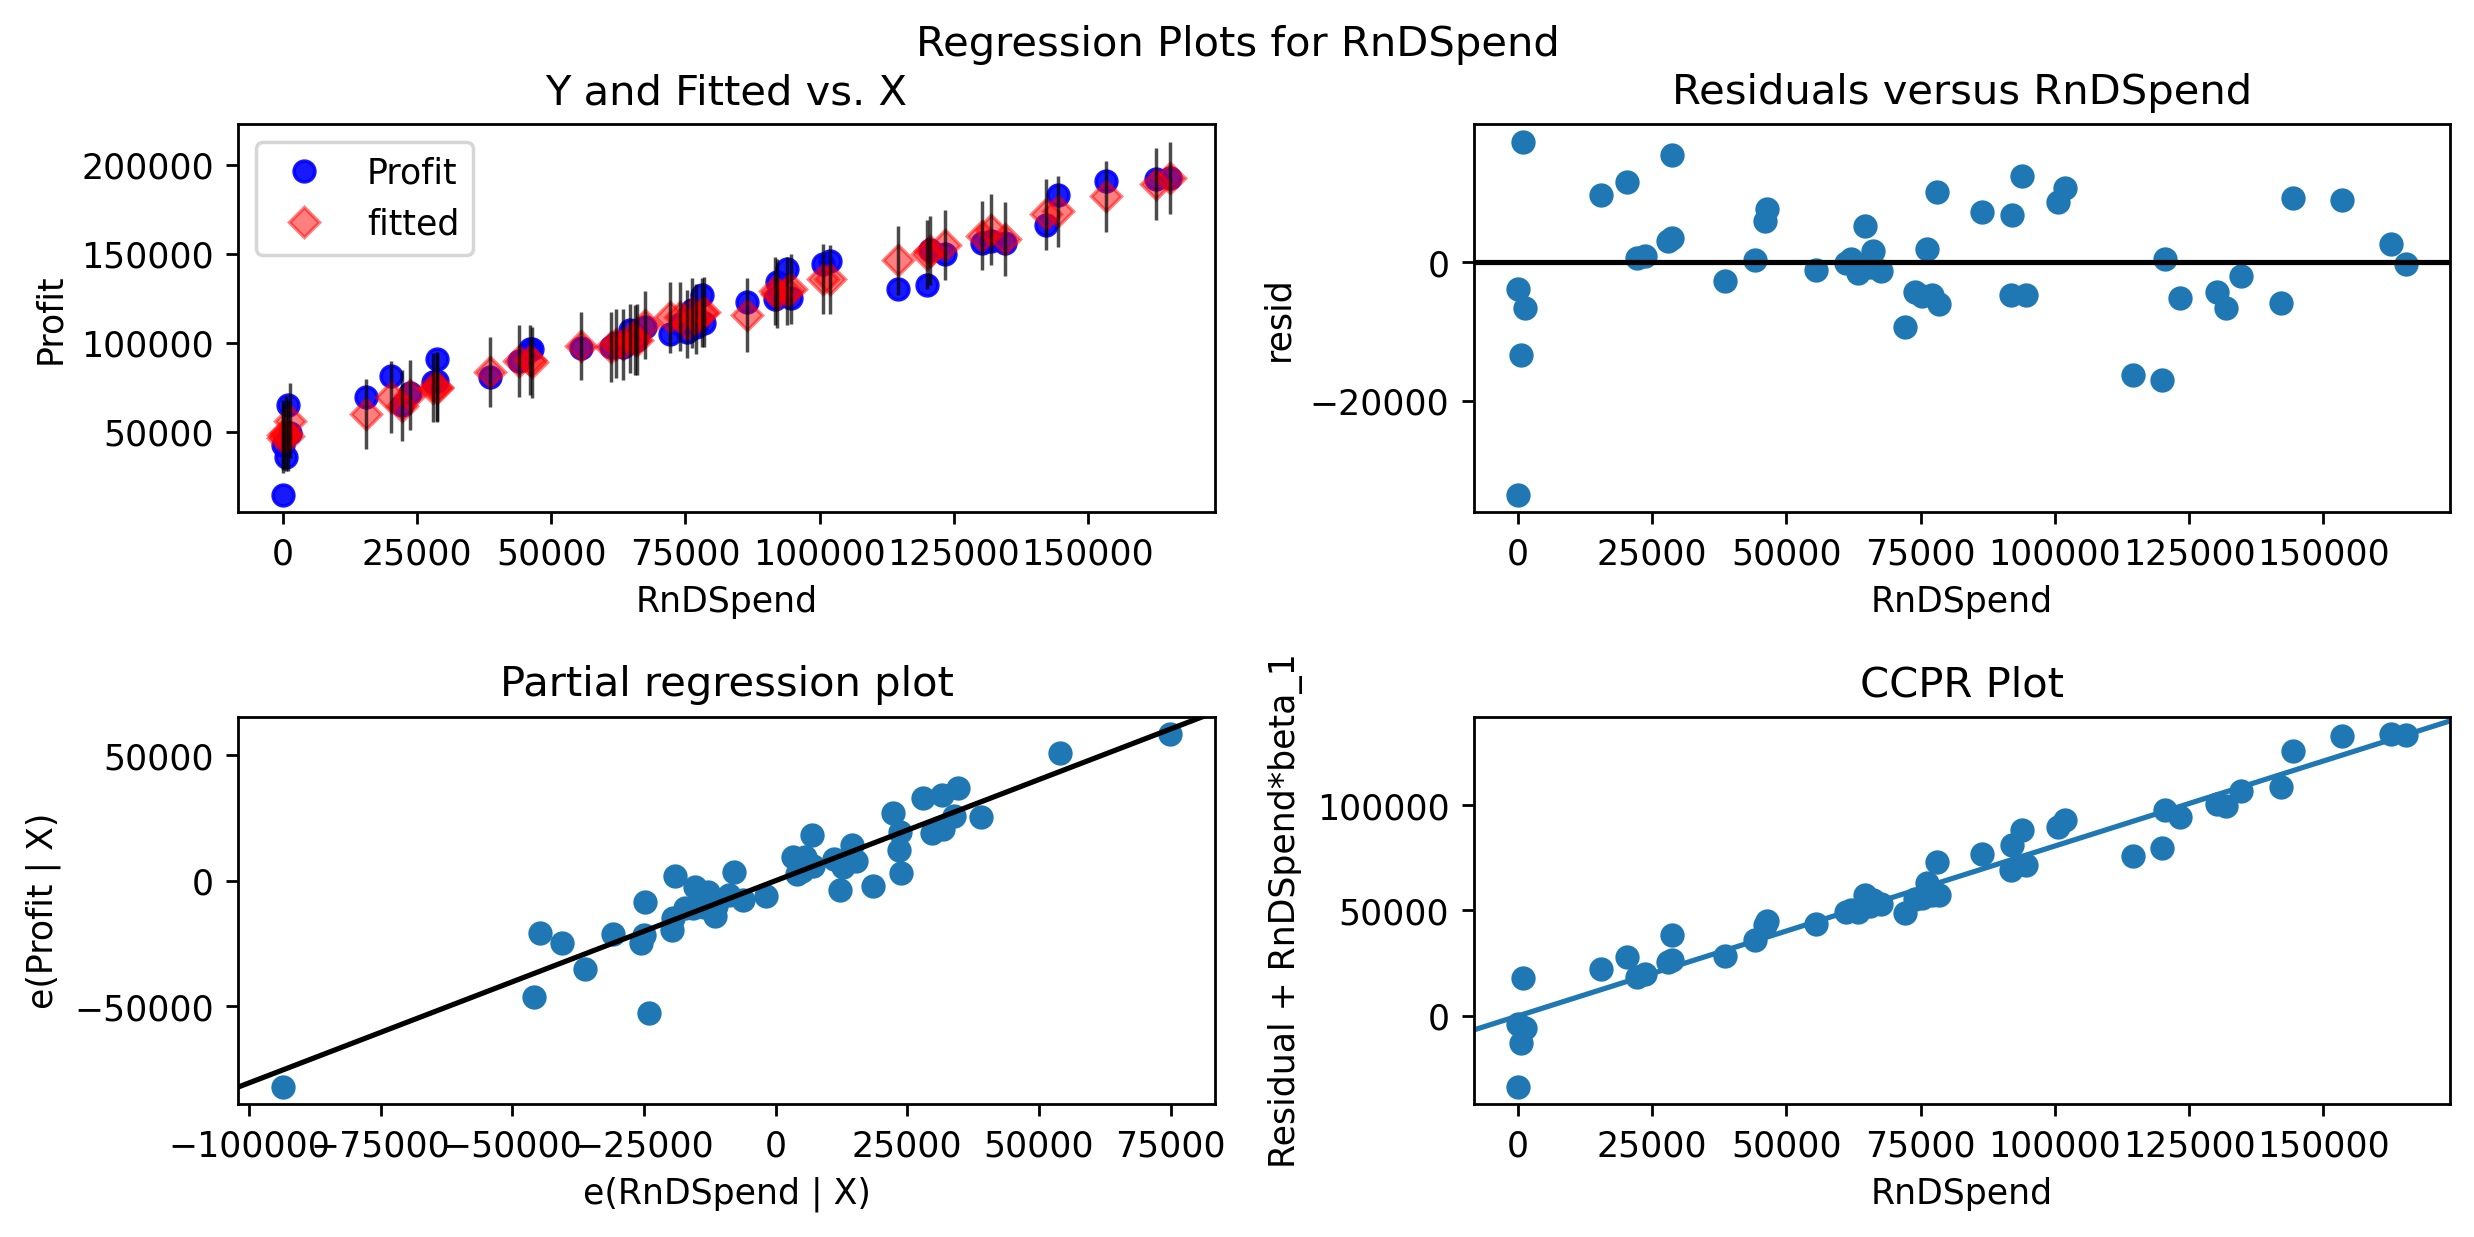

In [16]:
#RnDSpend
sm.graphics.plot_regress_exog(multialgo,'RnDSpend');

eval_env: 1


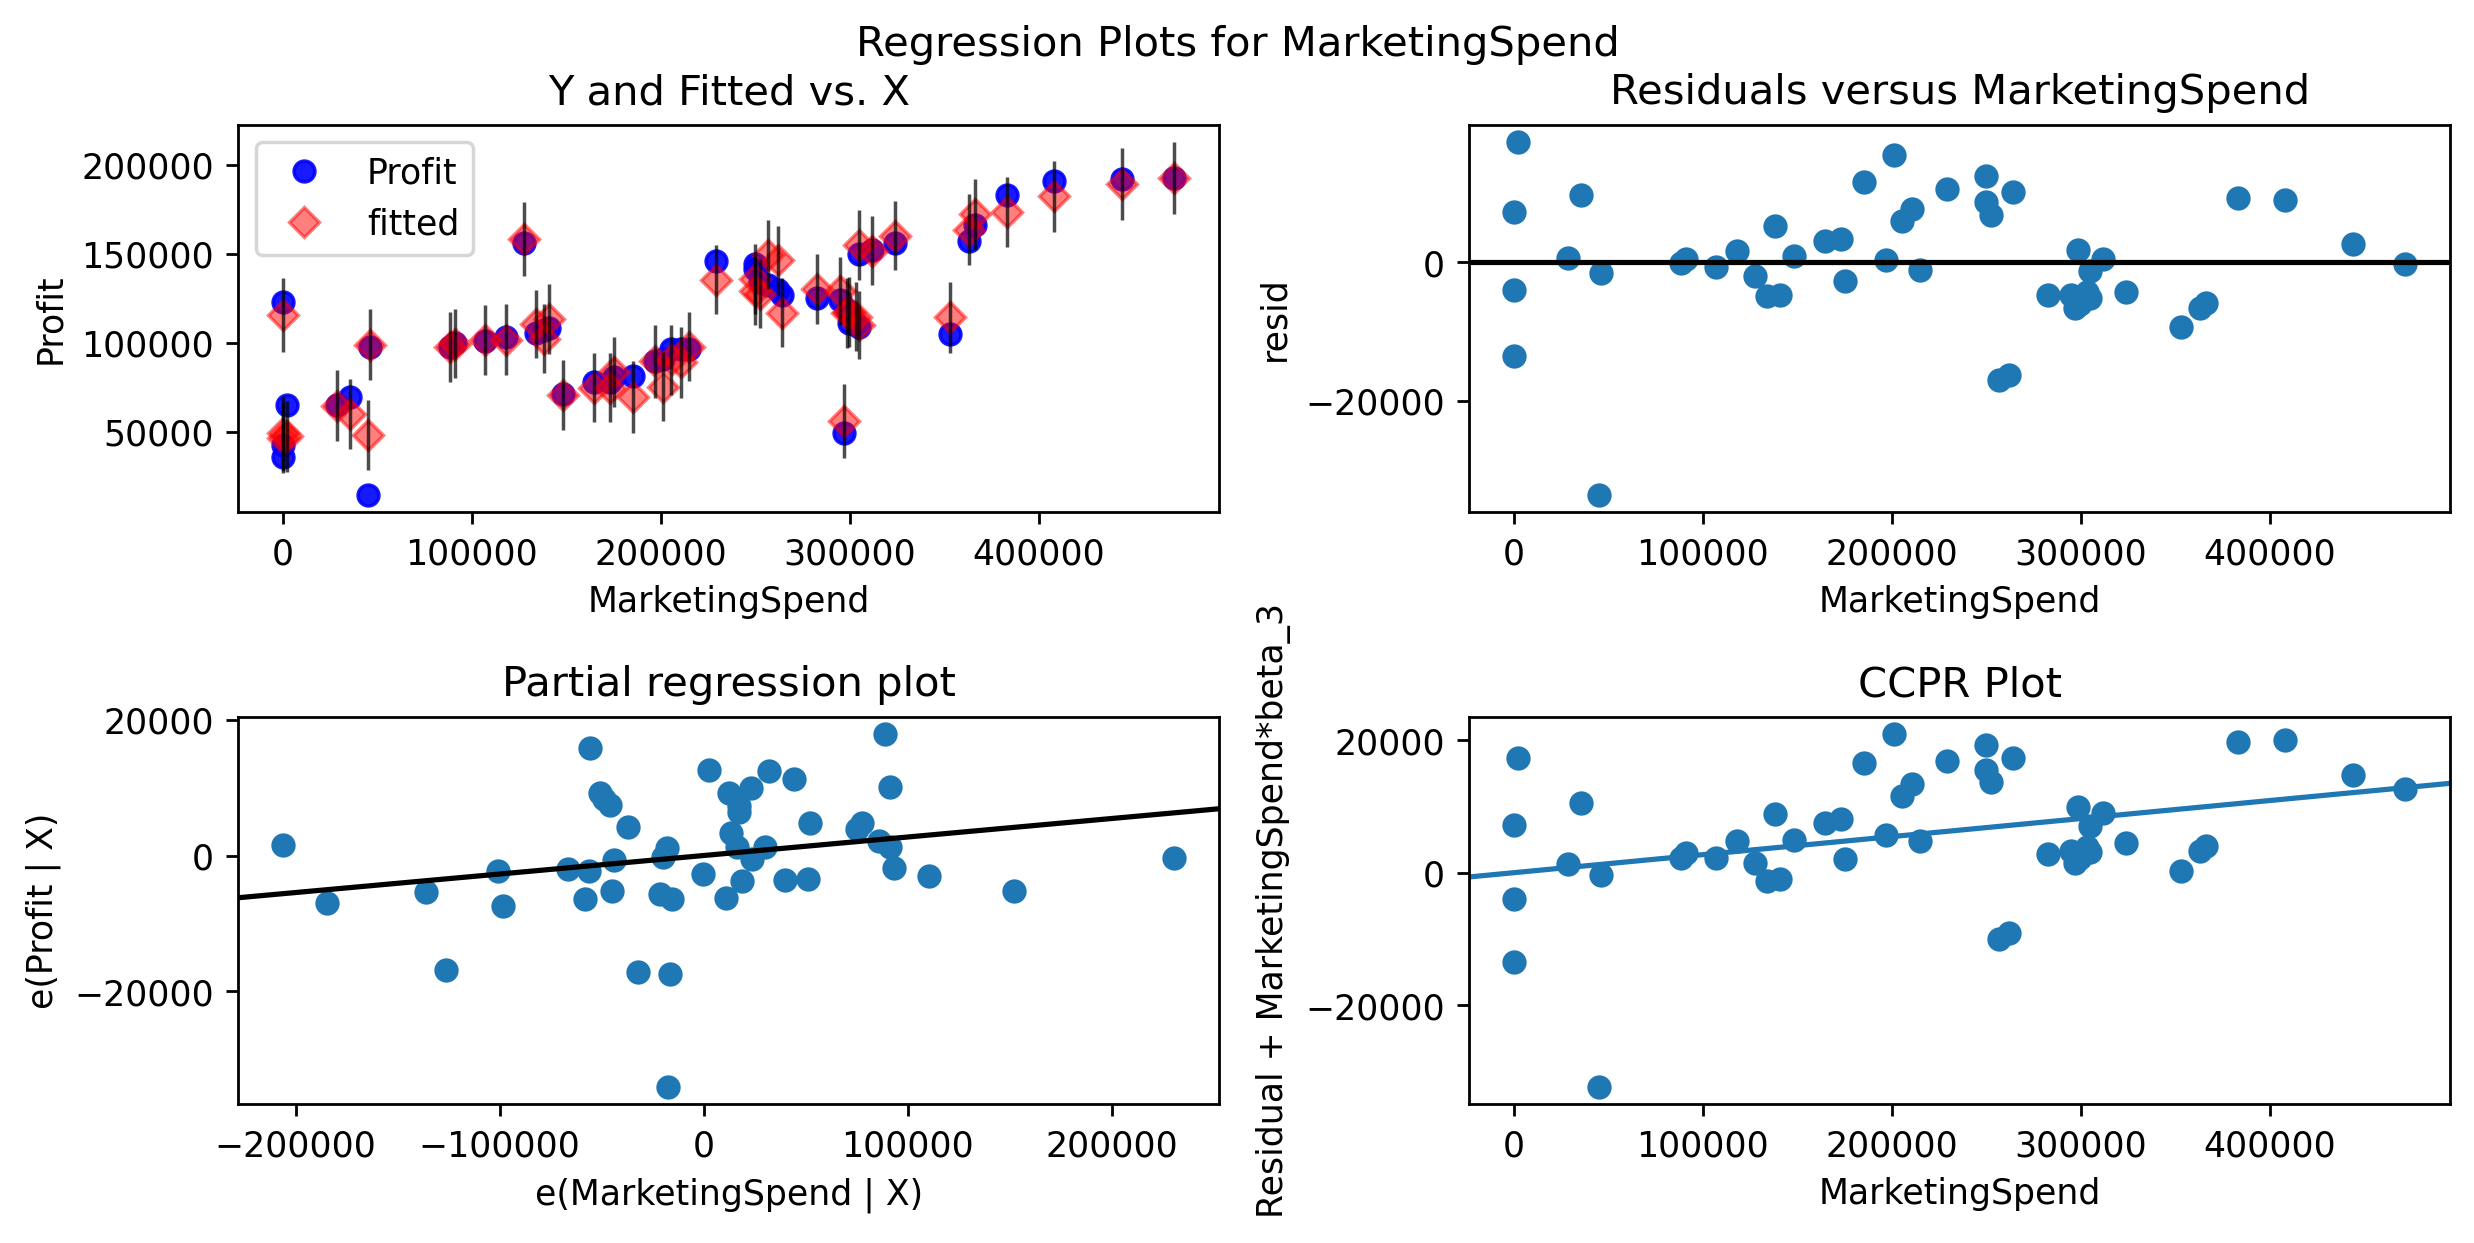

In [17]:
#MarketingSpend
sm.graphics.plot_regress_exog(multialgo,'MarketingSpend');

eval_env: 1


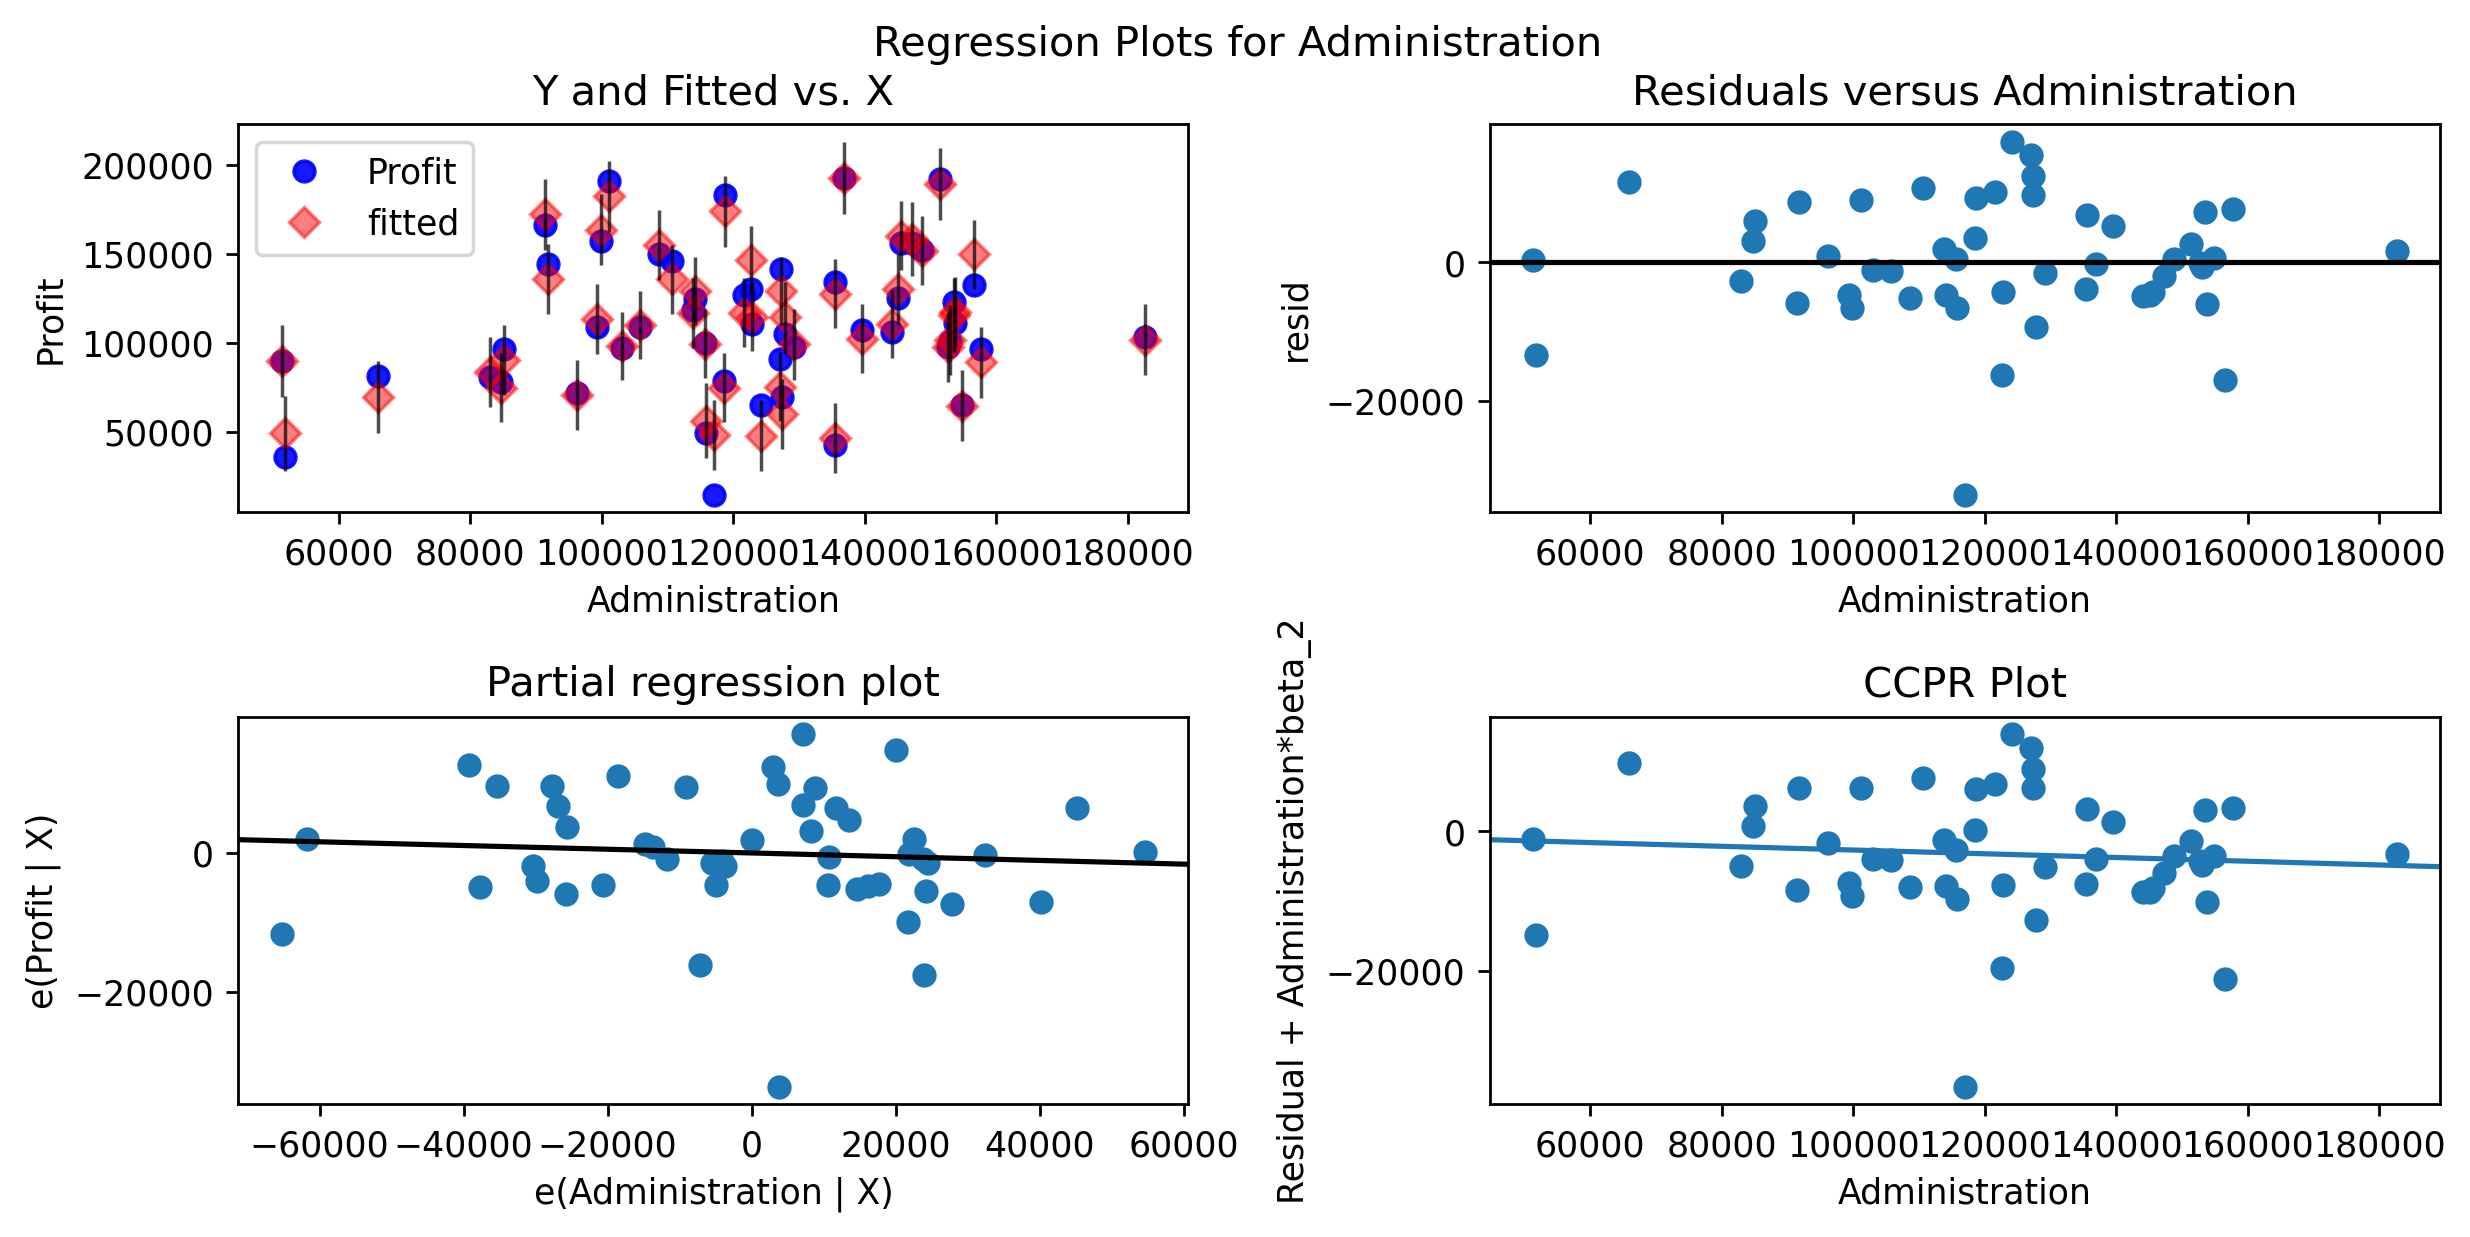

In [18]:
#Administration
sm.graphics.plot_regress_exog(multialgo,'Administration');

# MODEL DELETION Diagnostics
Cook's Distance
Detecting influencers and outliers

In [19]:
inf=multialgo.get_influence()
c,p = inf.cooks_distance
c

array([2.64962564e-05, 3.65460668e-03, 2.55553863e-02, 2.31878065e-02,
       1.14302043e-02, 1.23884179e-02, 3.11121982e-03, 2.80901852e-03,
       5.28558551e-05, 6.83388587e-03, 1.18531743e-02, 2.08698178e-02,
       9.05518079e-03, 7.11076506e-03, 4.81255370e-02, 4.55550364e-02,
       1.47917331e-02, 4.44019365e-03, 1.69993736e-03, 3.99363634e-02,
       6.08628041e-04, 1.22997651e-02, 2.28337576e-03, 2.15977000e-04,
       6.00485777e-03, 4.43262172e-03, 2.67612080e-03, 3.28473798e-02,
       1.03151489e-03, 1.51104626e-04, 3.28164666e-05, 9.07970048e-06,
       8.17741552e-04, 1.00239191e-04, 2.18081482e-02, 8.84928027e-03,
       4.36551851e-02, 5.68744297e-05, 6.25167081e-02, 1.85525357e-03,
       2.27307299e-03, 1.55244650e-03, 1.56379369e-04, 2.73167923e-02,
       1.17346160e-04, 1.12202649e-01, 4.28134712e-02, 5.41565252e-03,
       1.91163485e-01, 3.06028195e-01])

<StemContainer object of 3 artists>

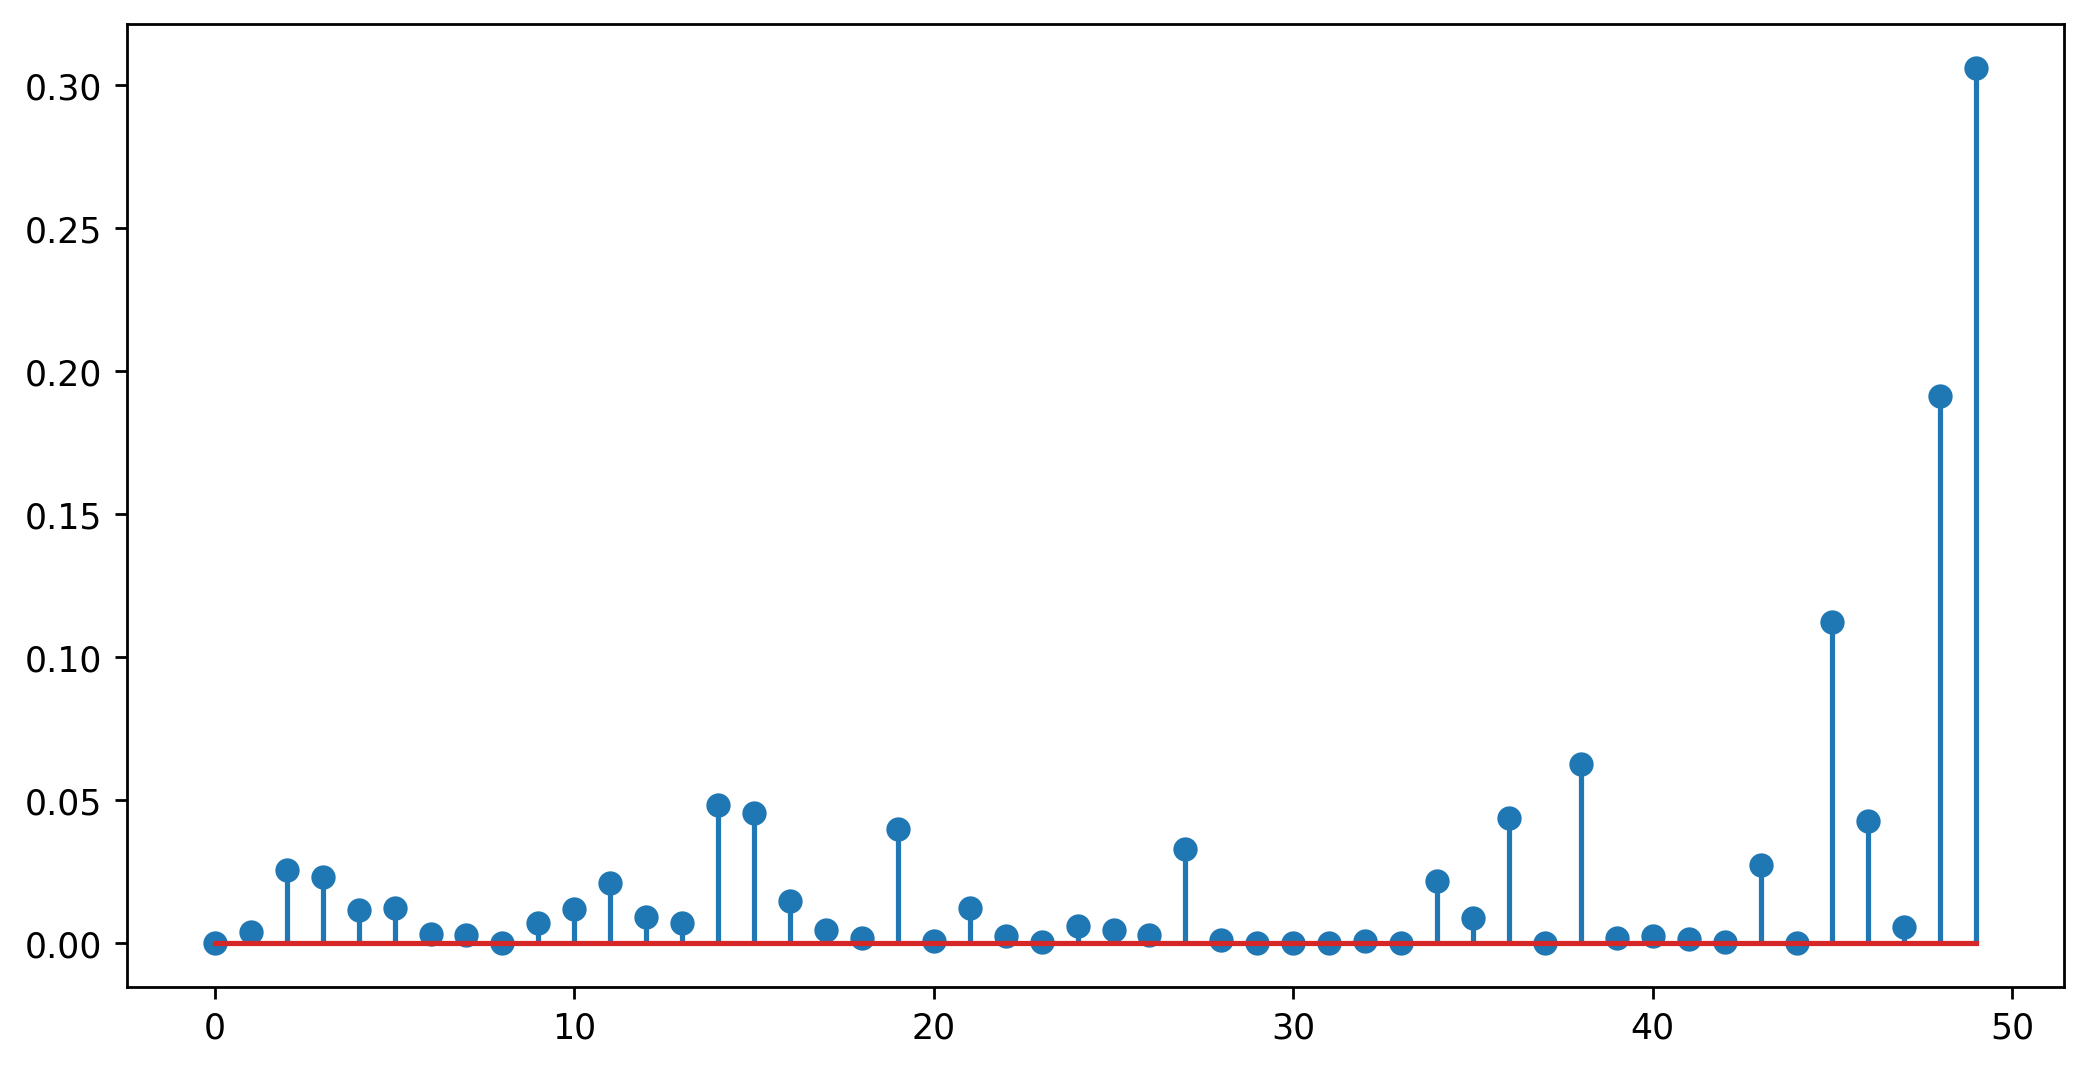

In [20]:
# Cook's distance plot
plt.stem(c)

In [21]:
np.argmin(c),np.min(c)

(31, 9.079700481245012e-06)

In [22]:
datastartup.iloc[[41]]

,RnDSpend,Administration,MarketingSpend,State,Profit
41,27892.92,84710.77,164470.71,1,77798.83


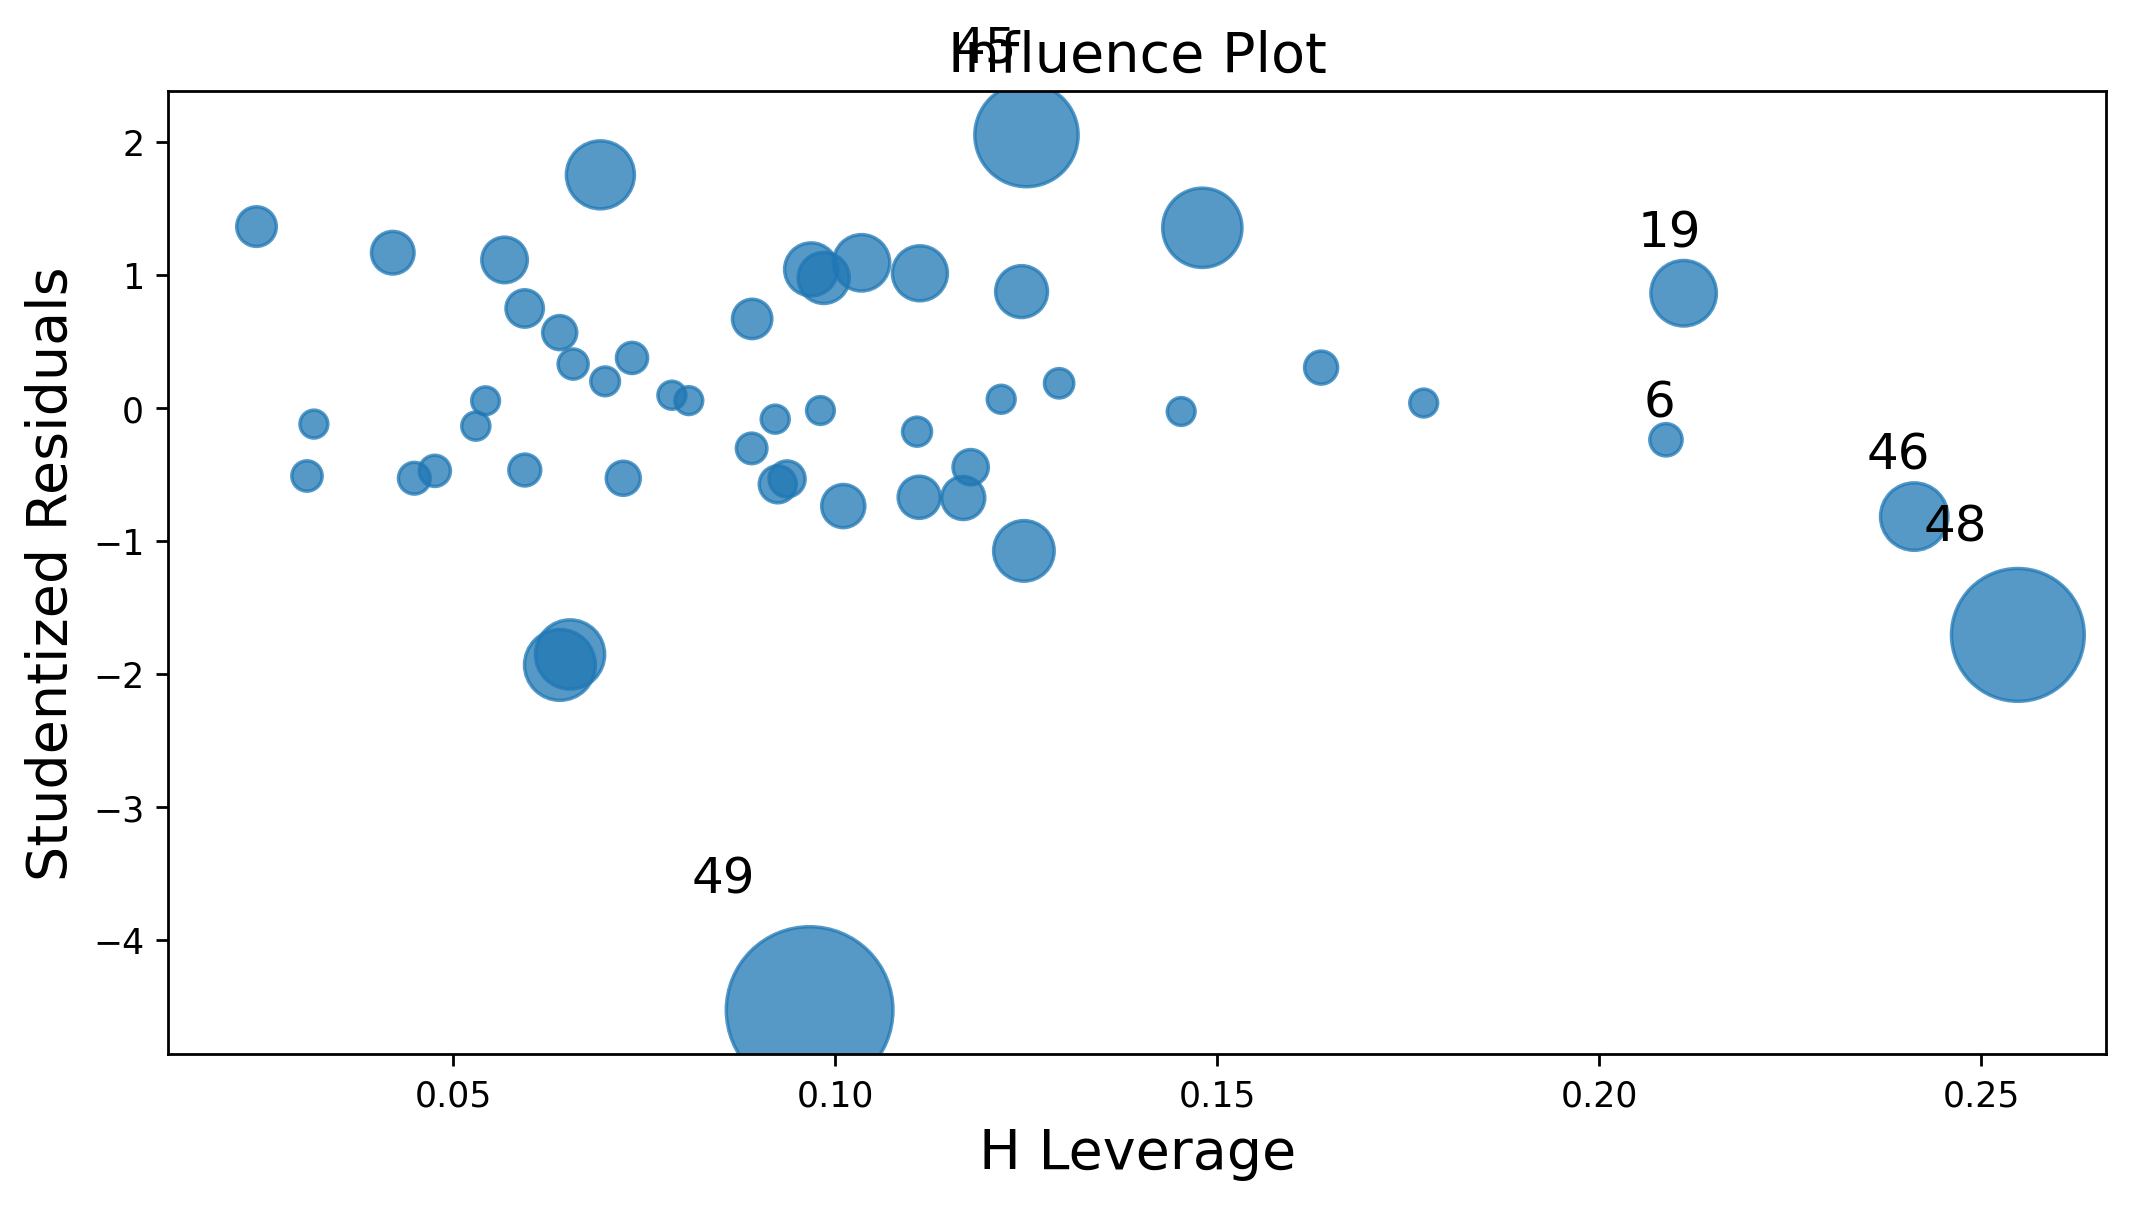

In [23]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(multialgo);

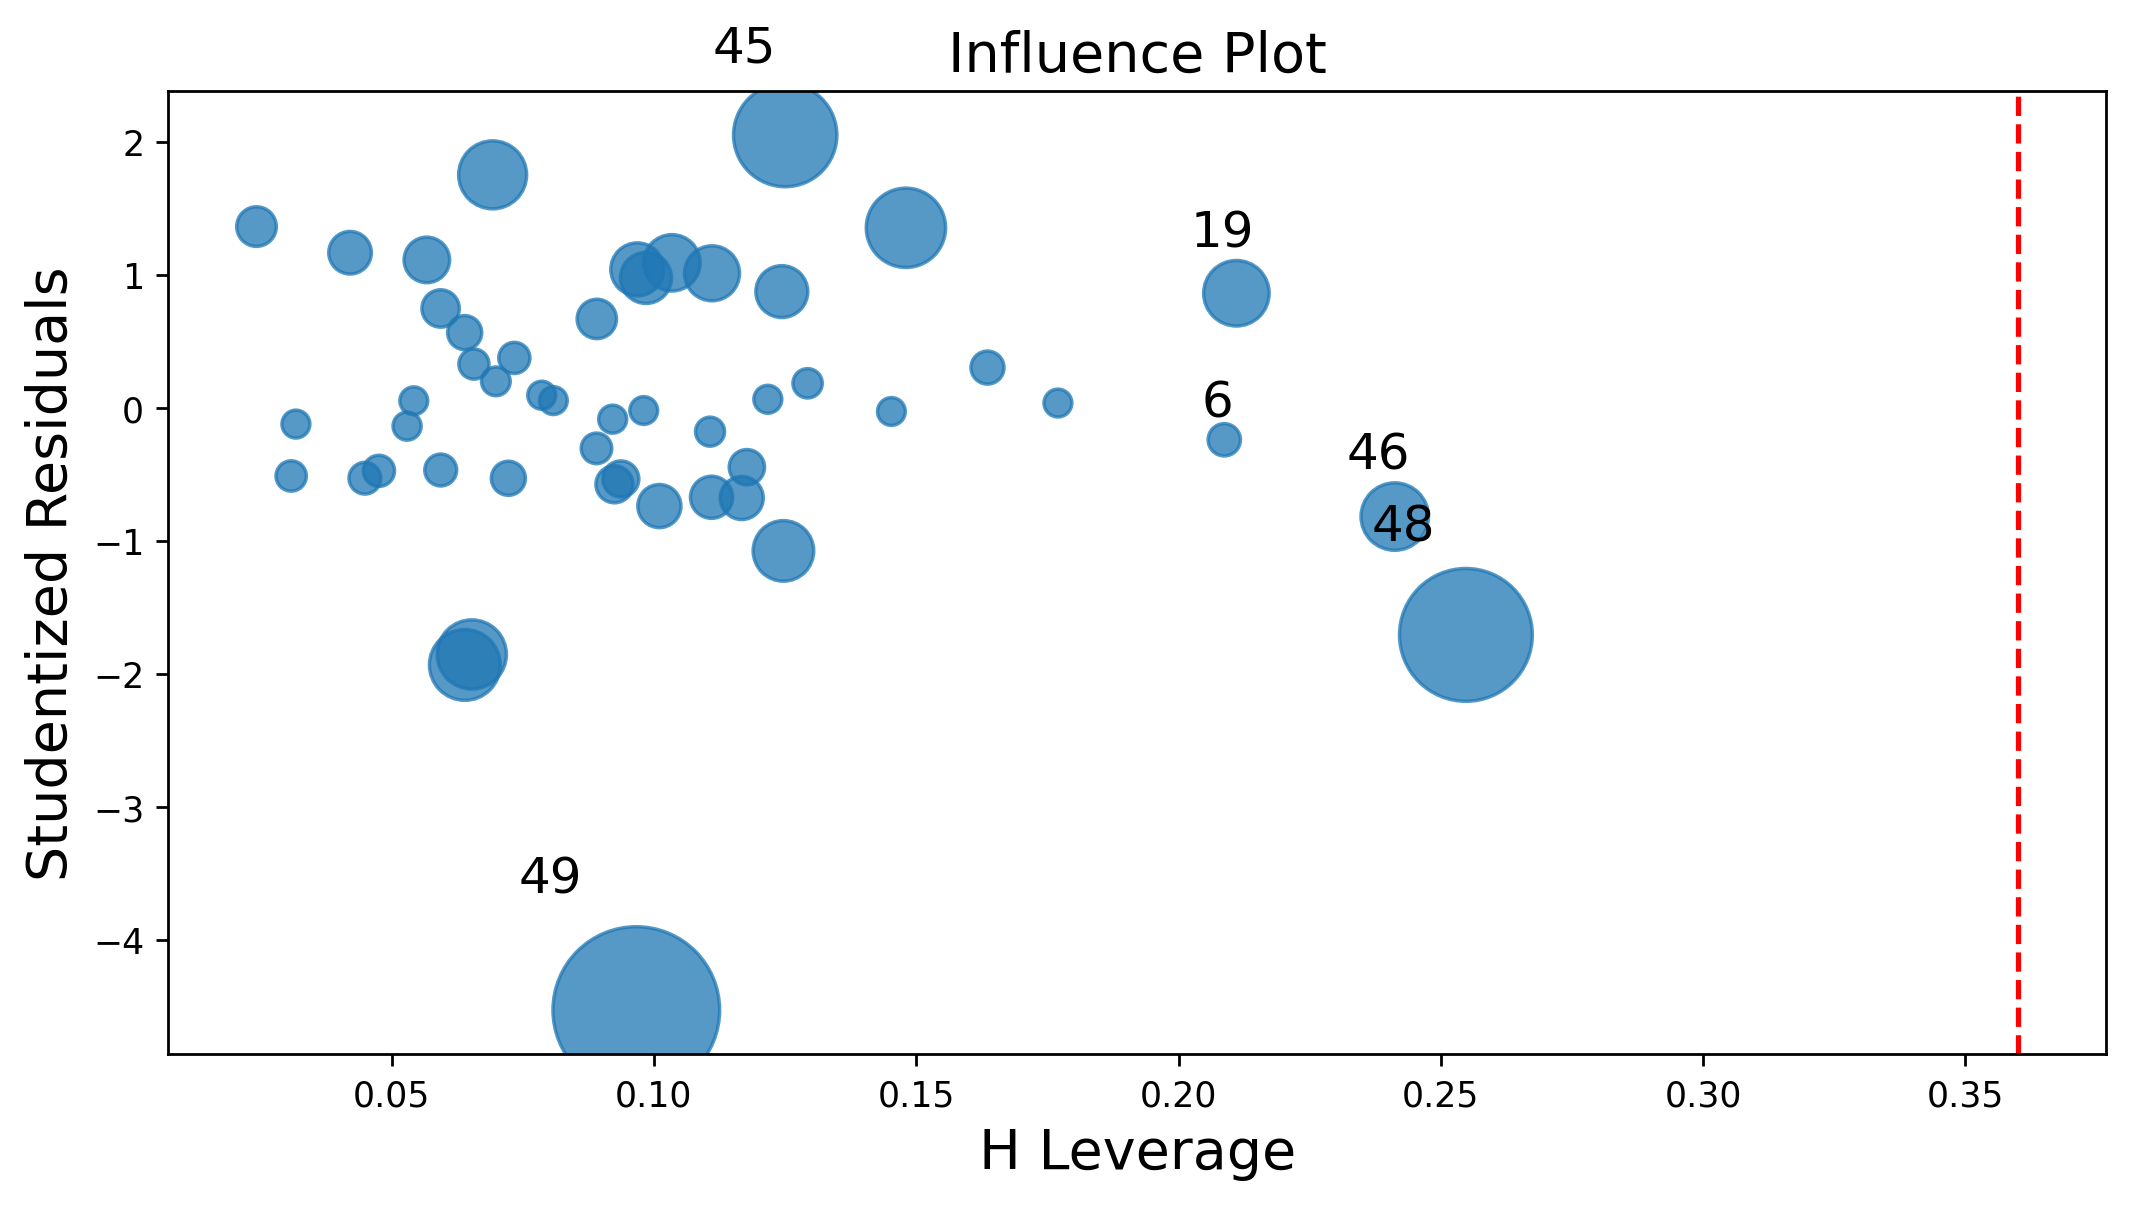

In [24]:
#Calculate cutoff
k = len(datastartup.columns)
n = len(datastartup)

levarge_cutoff = 3*(k+1)/n
levarge_cutoff
influence_plot(multialgo)
plt.axvline(levarge_cutoff,color = 'red',linestyle = '--')

In [25]:
np.argmax(c),np.max(c)

(49, 0.3060281954699332)

# Improving the model

In [26]:
print(datastartup.shape)
# datastartup.drop(index=[41],inplace=True)
datastartup.shape

(50, 5)


(50, 5)

<StemContainer object of 3 artists>

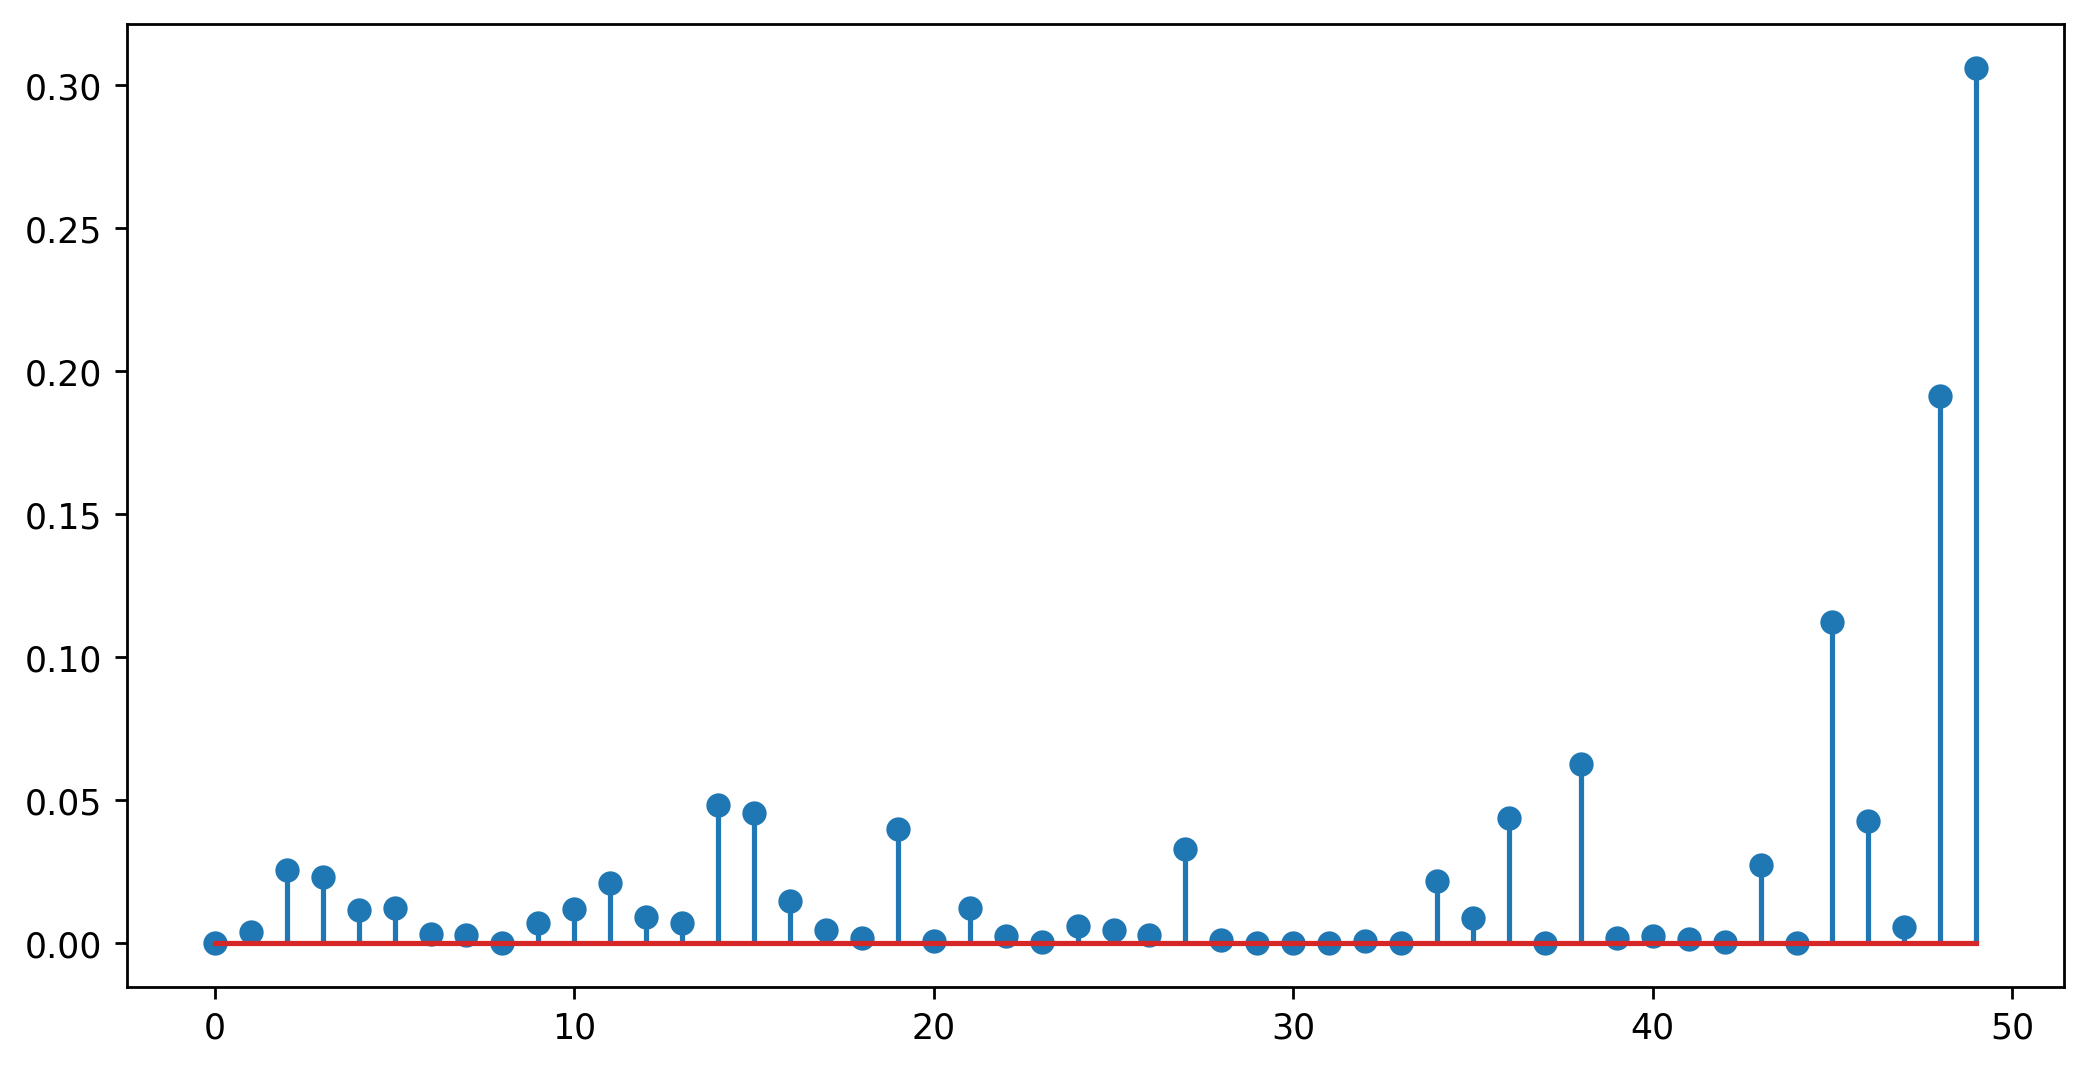

In [27]:
multialgofinal=smf.ols('Profit~RnDSpend+Administration+MarketingSpend+State',data=datastartup).fit()
inf=multialgofinal.get_influence()
c,p = inf.cooks_distance
c
plt.stem(c)


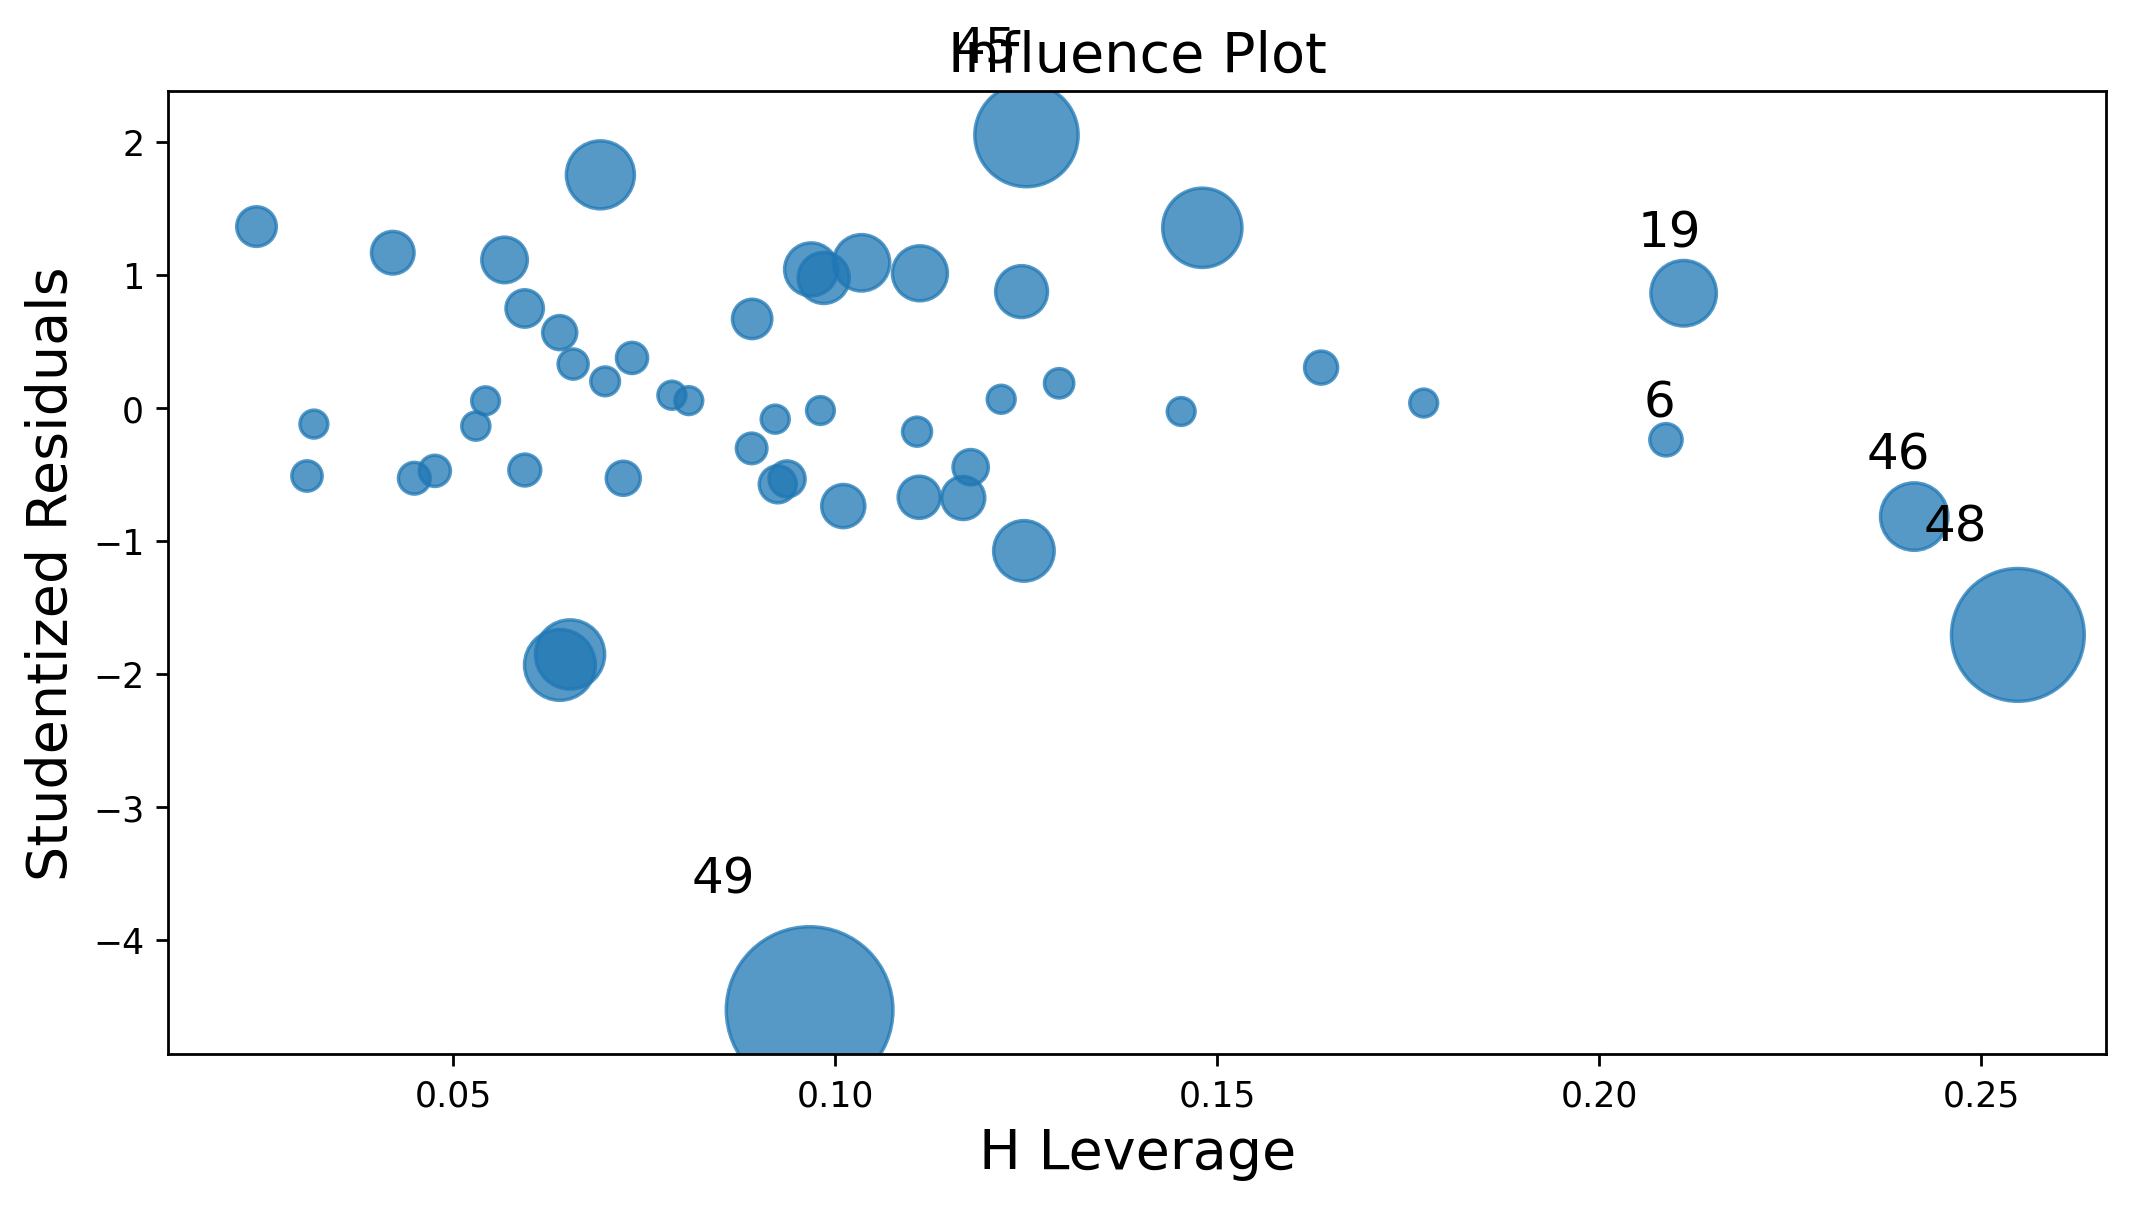

In [28]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(multialgofinal);

Since the value is <1 , we can stop the diagnostic process and finalize the model

# Predicting for new records

In [32]:
newdf = pd.DataFrame({'RnDSpend':[73051,10000],'Administration':[122699,182699],'MarketingSpend':[212716,452716],'State':[1,2]})
multialgofinal.predict(newdf)

0    111481.991646
1     65580.807241
dtype: float64